<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Installing and Importing necessary libraries

In [1]:
# Installing the required python libraries
!pip install tensorflow==2.17.0 scikit-learn==1.3.1 seaborn==0.13.1 matplotlib==3.8.0 numpy==1.25.2 pandas==2.2.2 imbalanced-learn==0.10.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 5.8 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
# Import the required libraries numerical and plotting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# import model libraries
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# import metric libraries
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score


import time  # Module for time-related operations.
import random
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
# load the churn.csv file

df = pd.read_csv('Churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Data Overview

In [4]:
# Shape of the dataset
df.shape

(10000, 14)

In [5]:
# Information about the dataset
print("\nInfo:")
df.info()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# view the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# statiscal summary
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# Print the number of duplicate rows if any
duplicate_rows = df[df.duplicated()]
num_duplicate_rows = len(duplicate_rows)
print("Number of duplicate rows:", num_duplicate_rows)

Number of duplicate rows: 0


In [9]:
# find unique values
df.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


## RowNumber and CustomerId are unique items

In [10]:
# Delete unique columns
df = df.drop(['RowNumber', 'CustomerId'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [11]:
# Surname is an identifier so removing it as it does not have any impact on the data
df = df.drop('Surname', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
# Find the unique values of all the discrete variables

discrete_columns = ['Gender','Geography', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

for column in discrete_columns:
  print(f"Unique values for {column}: {df[column].unique()}")

Unique values for Gender: ['Female' 'Male']
Unique values for Geography: ['France' 'Spain' 'Germany']
Unique values for Tenure: [ 2  1  8  7  4  6  3 10  5  9  0]
Unique values for NumOfProducts: [1 3 2 4]
Unique values for HasCrCard: [1 0]
Unique values for IsActiveMember: [1 0]
Unique values for Exited: [1 0]


In [13]:
# Find the value count percentage

value_counts_percentage = df['Exited'].value_counts(normalize=True) * 100
value_counts_percentage

,proportion
Exited,
0,79.63
1,20.37


## Observations

- There are 10000 rows in the dataset.
- There are no null values.
- The target data is not normalized, with 79.63% of existing bank customer and 20.37% of left customers.
- There are few categorical variables, may need conversion to numerical based on EDA.

## Exploratory Data Analysis

### Univariate Analysis

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [16]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [17]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

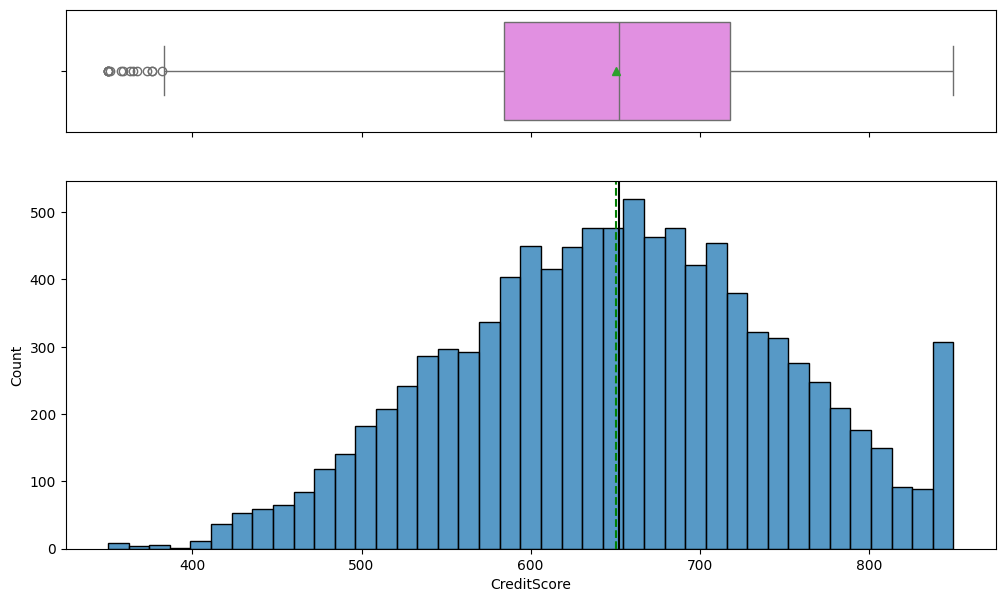

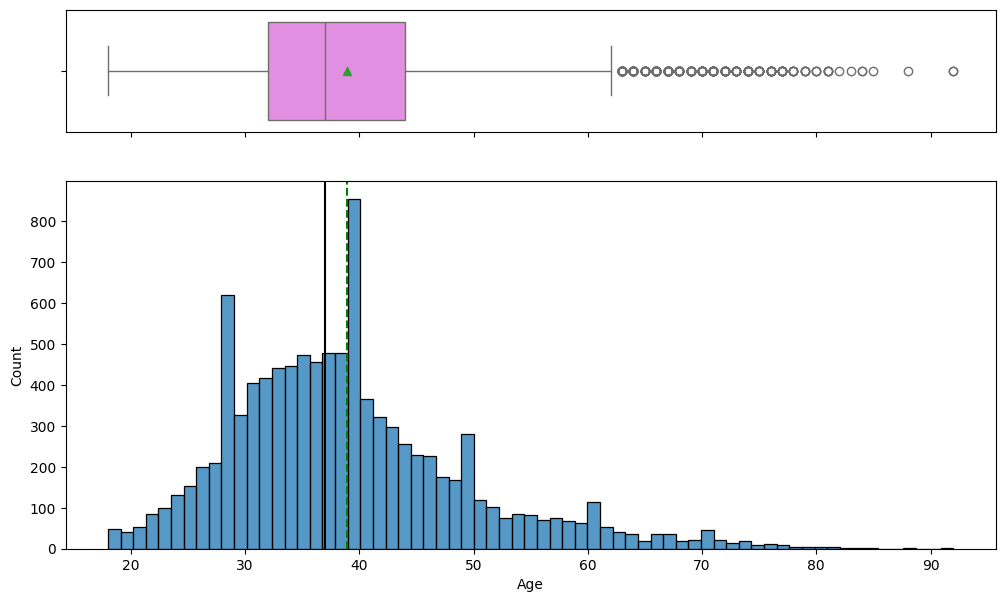

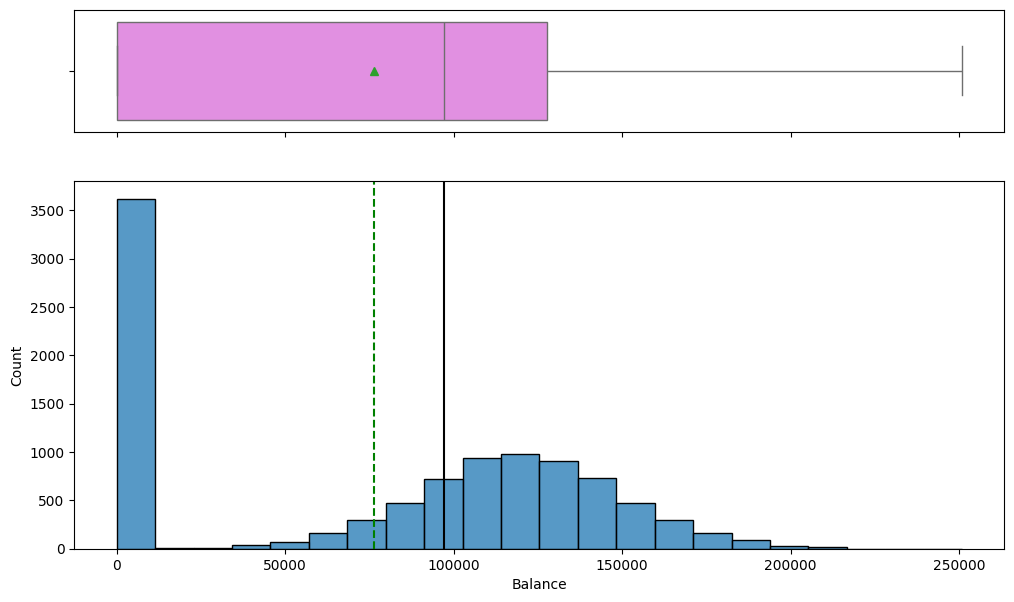

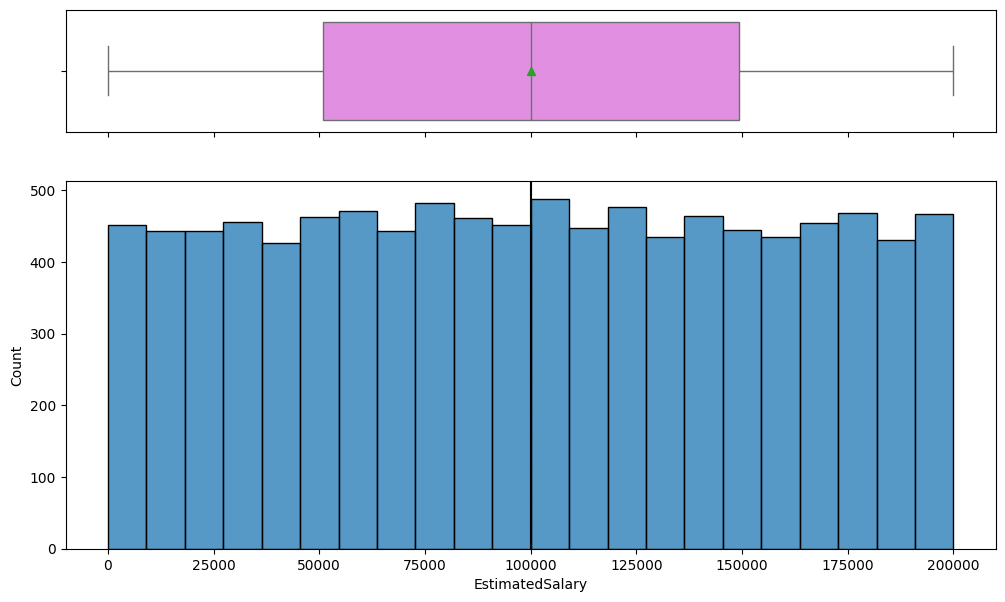

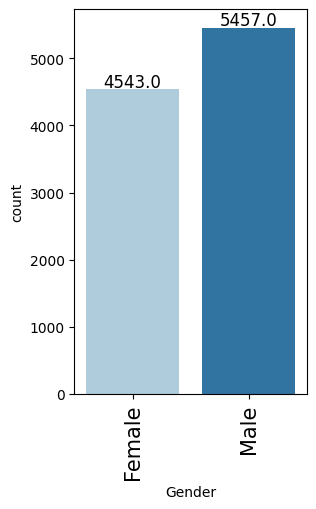

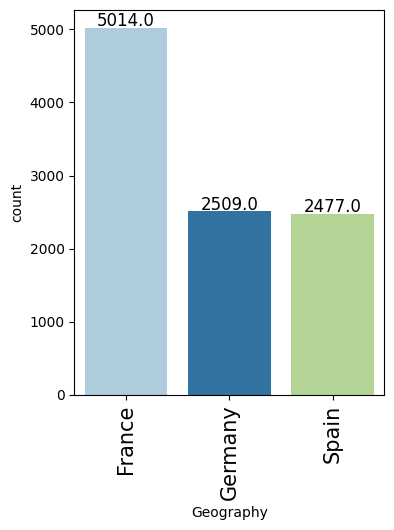

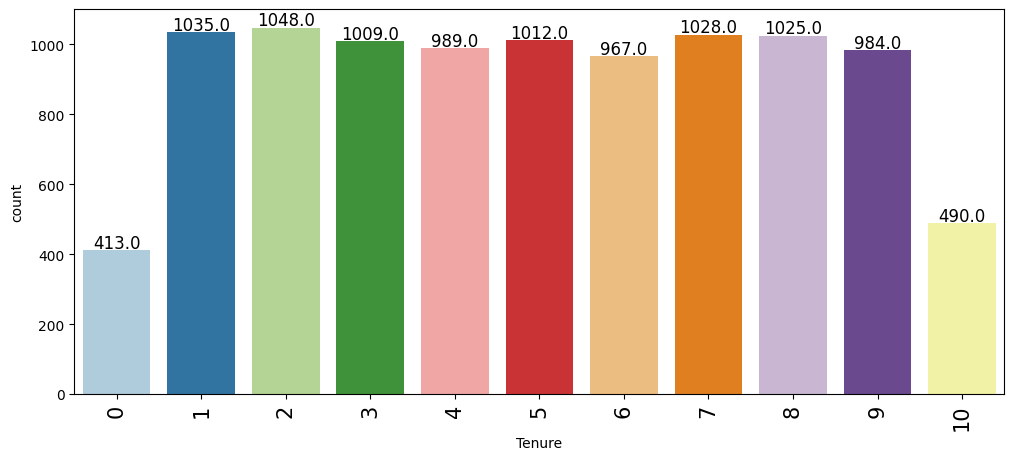

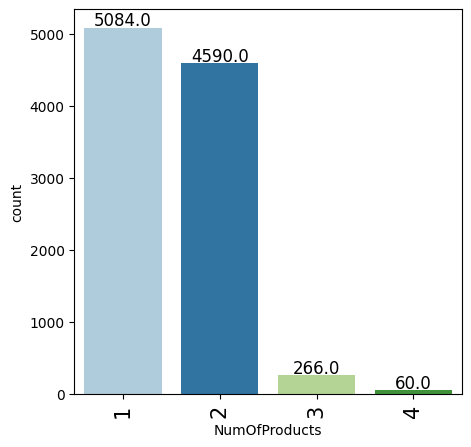

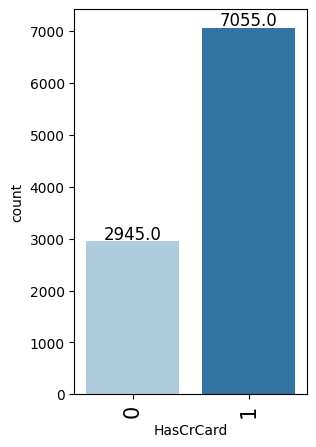

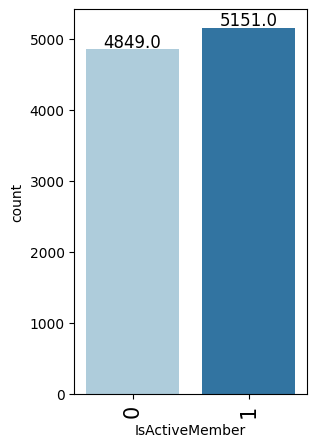

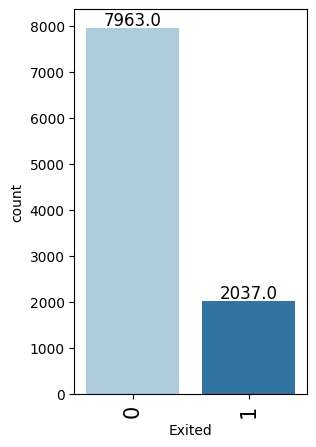

In [18]:
# univariate analysis using above functions

continuous_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
for column in continuous_columns:
  histogram_boxplot(df, column)

discrete_columns = ['Gender','Geography', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
for column in discrete_columns:
  labeled_barplot(df, column)


## Observations



---

- **Estimated Salary**: Our analysis indicates that the estimated salary distribution is normal, which provides a stable baseline for our financial assessments.

- **Credit Score**: The credit score is also normally distributed, although we have identified a few outliers. Upon review, these outliers appear to be valid and will remain unaltered in our dataset.

- **Age Distribution**: The age distribution shows a right skew; however, it is noteworthy that there are no outliers present in this data.

- **Balance**: The balance feature demonstrates a slight right skew, but the extent is minimal and does not necessitate any further processing at this time.

- **Customer Demographics**: Our customer base is predominantly located in France, with significantly fewer clients from Germany and Spain.

- **Product Ownership**: Most of our customers hold either one or two products. A minority of customers have three or four products.

- **Credit Card Penetration**: The data shows that a majority of our customers possess a credit card, indicating a strong engagement with this product.

- **Next Steps**: I plan to conduct further analysis to understand how each of these features contributes to our key performance indicators.

---


### Bivariate Analysis

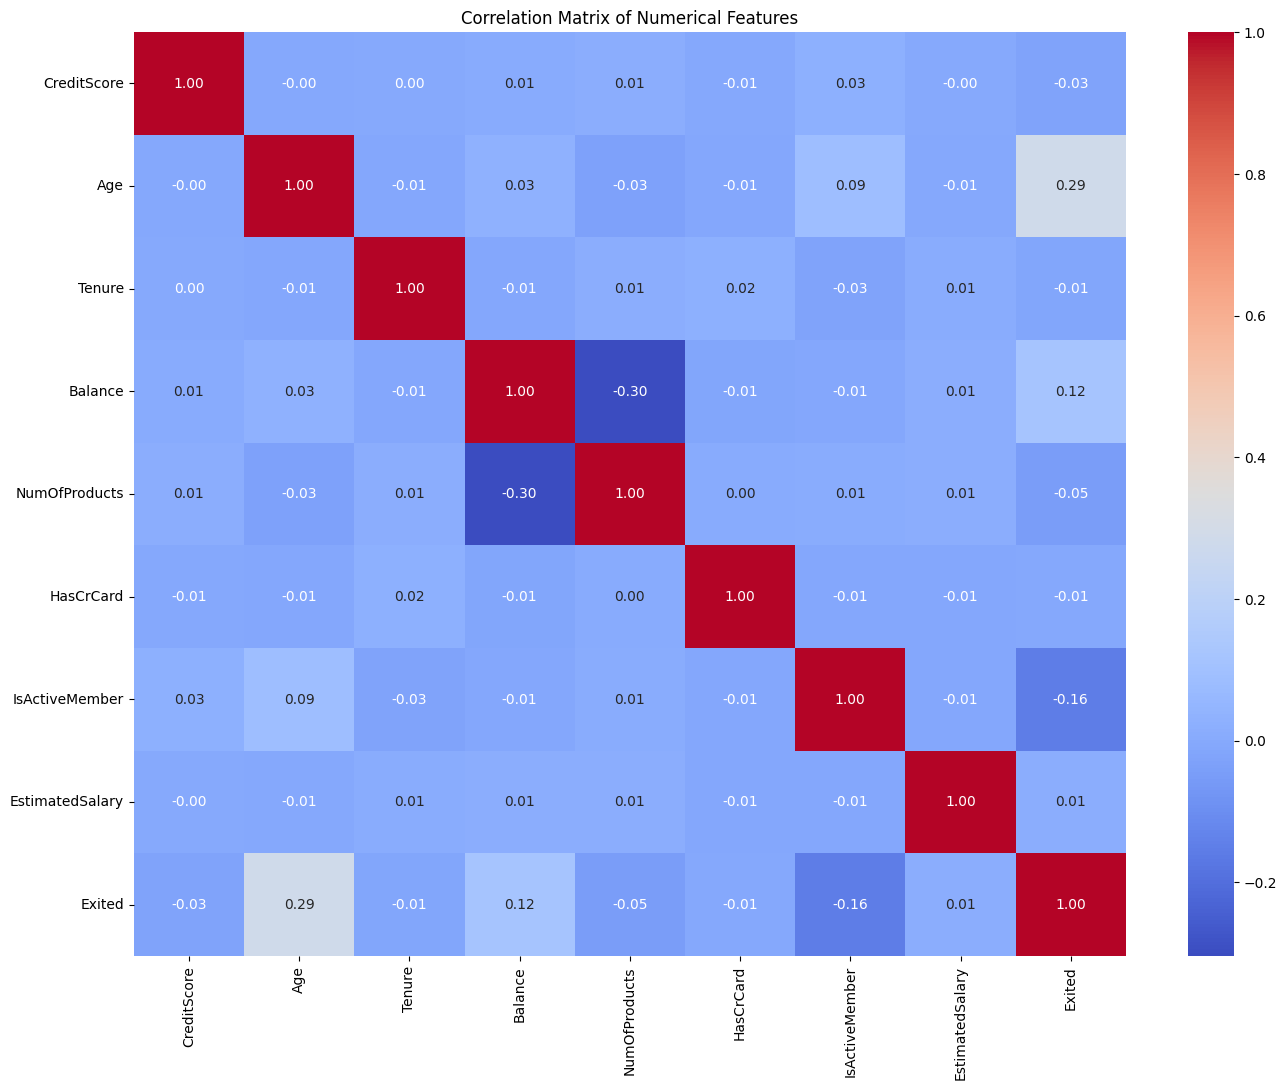

In [19]:
# Select only numerical columns for the heatmap
numerical_data = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Observations

- Overall, the correlations among the features are generally weak.
- The variable "Balance" exhibits a moderate negative correlation of -0.30 with the number of products held by customers.
- "Age" demonstrates a moderate positive correlation of 0.29 with the target variable, "Exited."
- Conversely, "IsActiveMember" shows a moderate negative correlation of -0.16 with "Exited."
- Additionally, "Balance" presents a moderate positive correlation of 0.12 with "Exited."

These insights suggest specific relationships that may warrant further investigation.

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


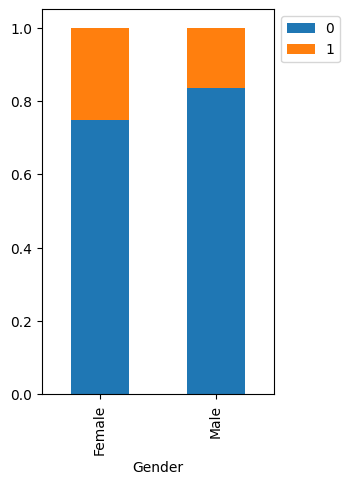

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


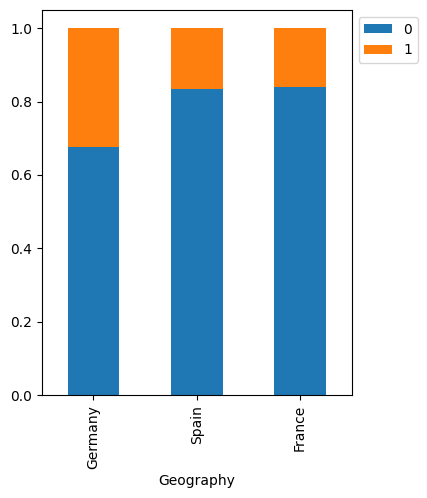

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


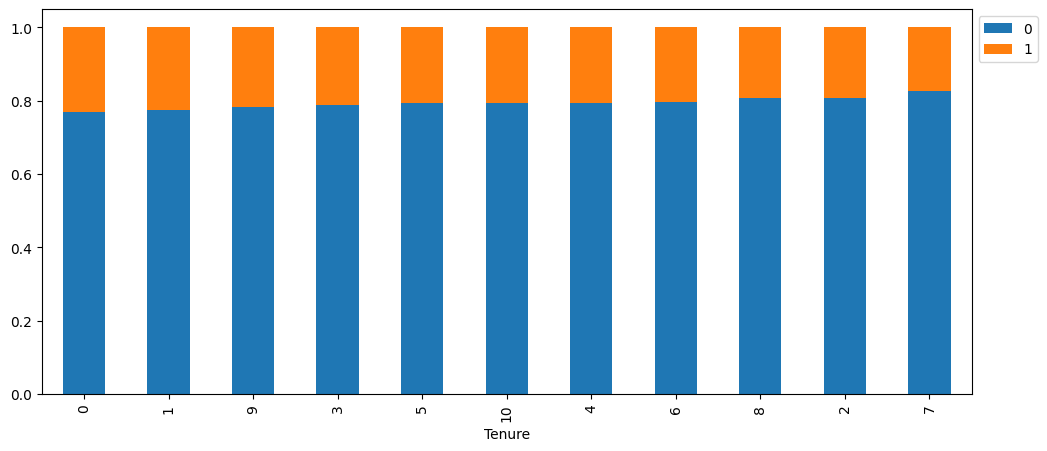

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


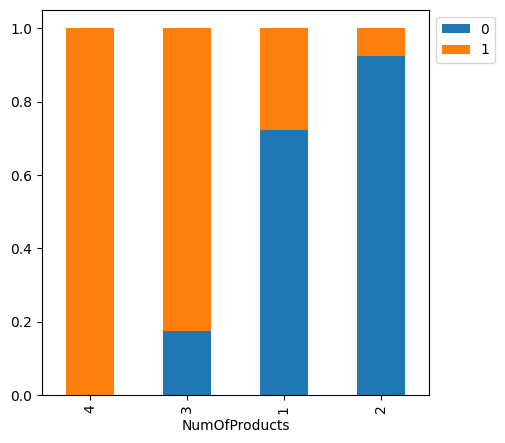

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


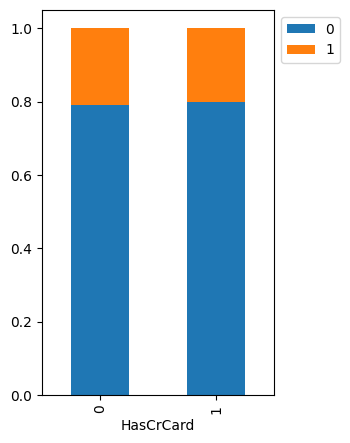

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


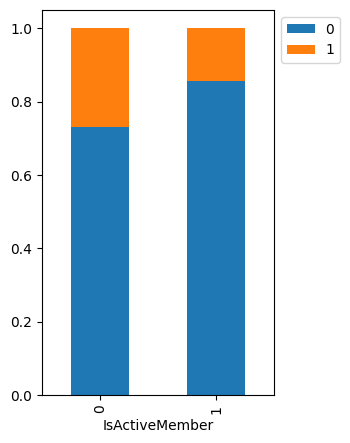

Exited     0     1    All
Exited                   
1          0  2037   2037
All     7963  2037  10000
0       7963     0   7963
------------------------------------------------------------------------------------------------------------------------


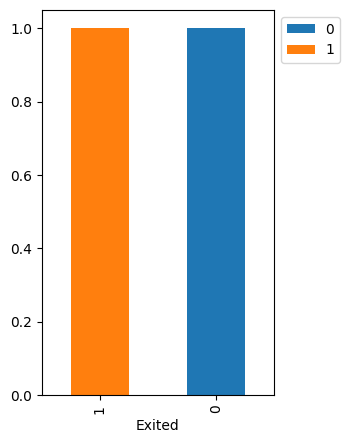

In [20]:
# plot stacked_barplot using the above function for all valid columns

for column in discrete_columns:
  stacked_barplot(df, column, 'Exited')

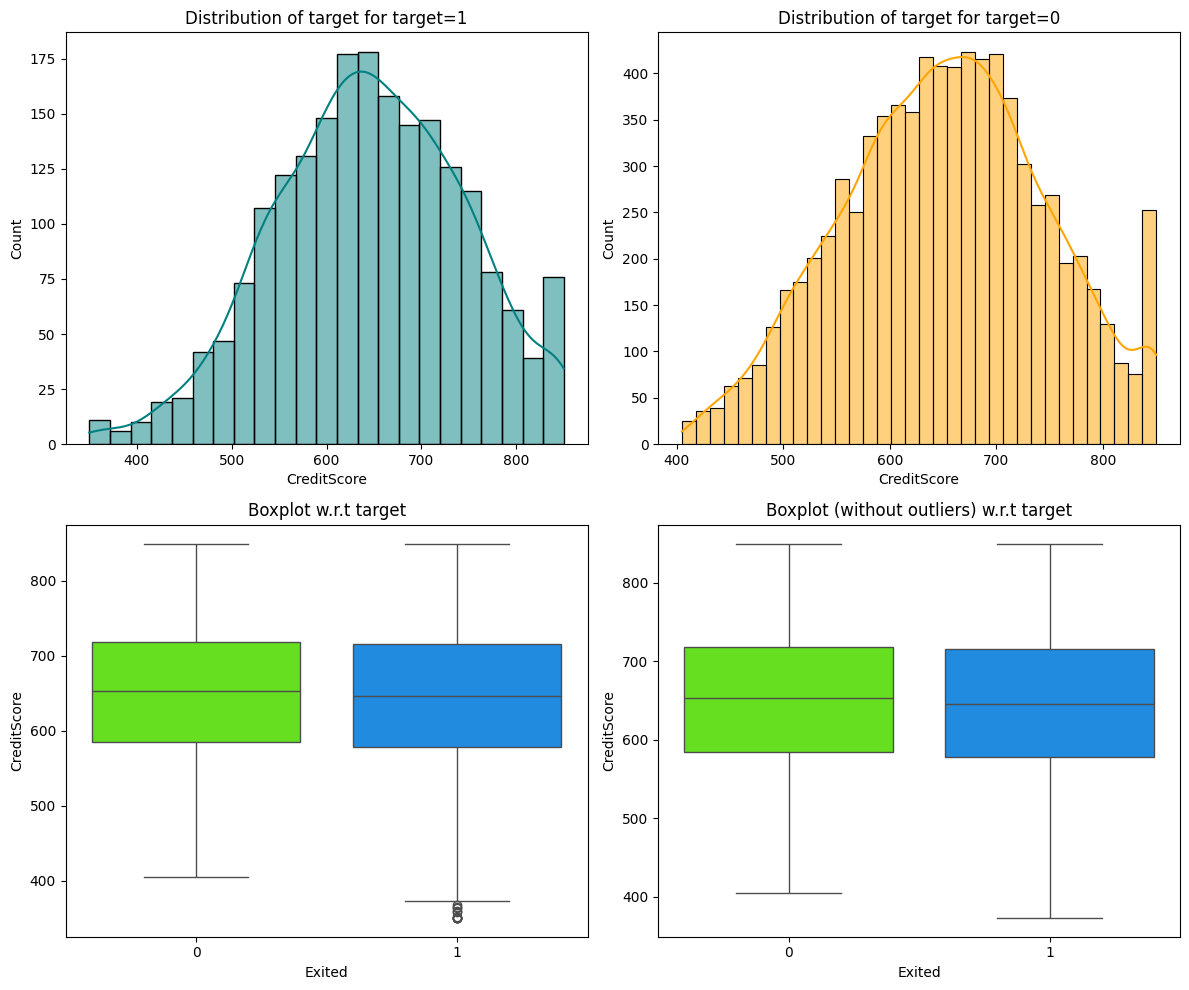

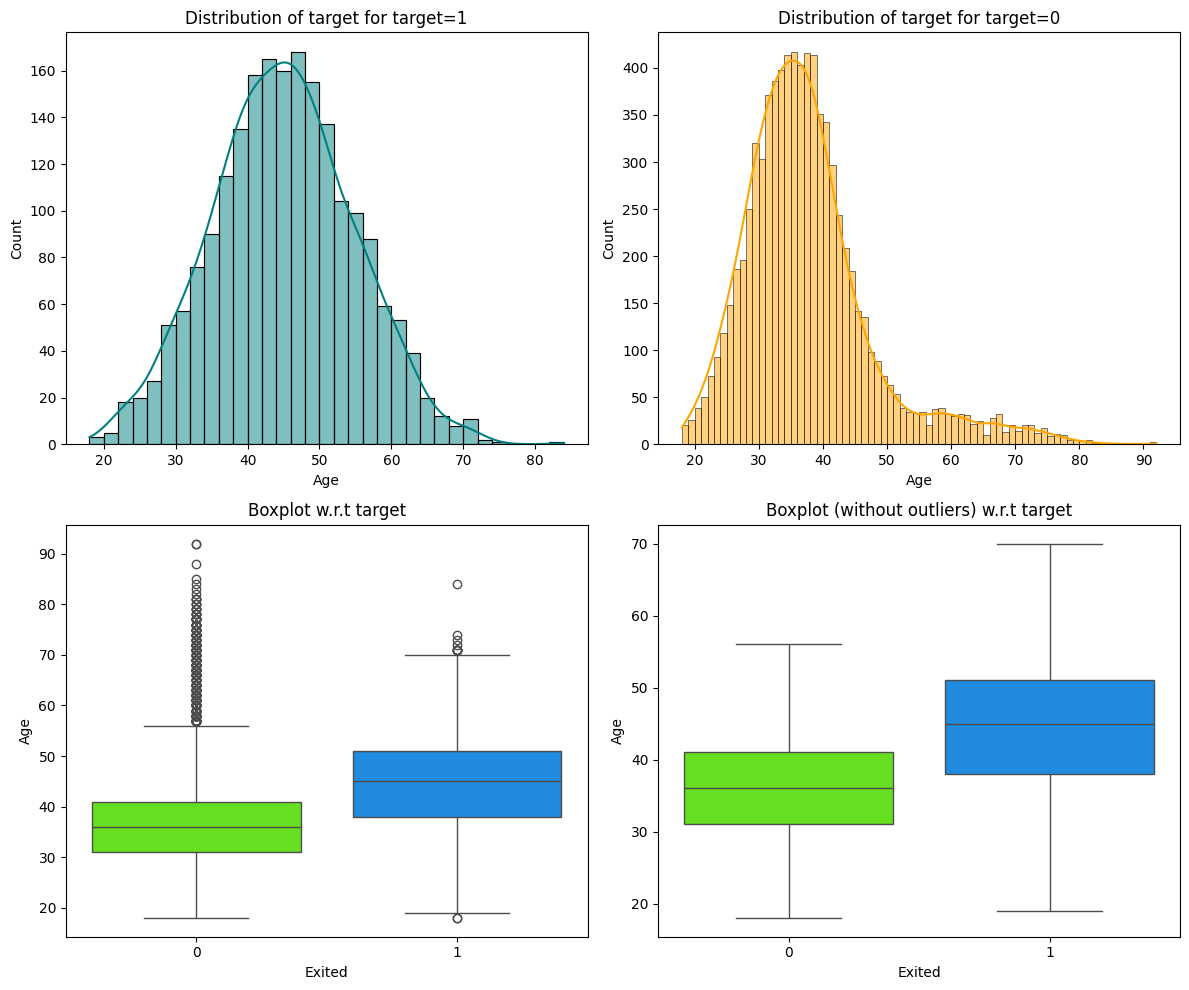

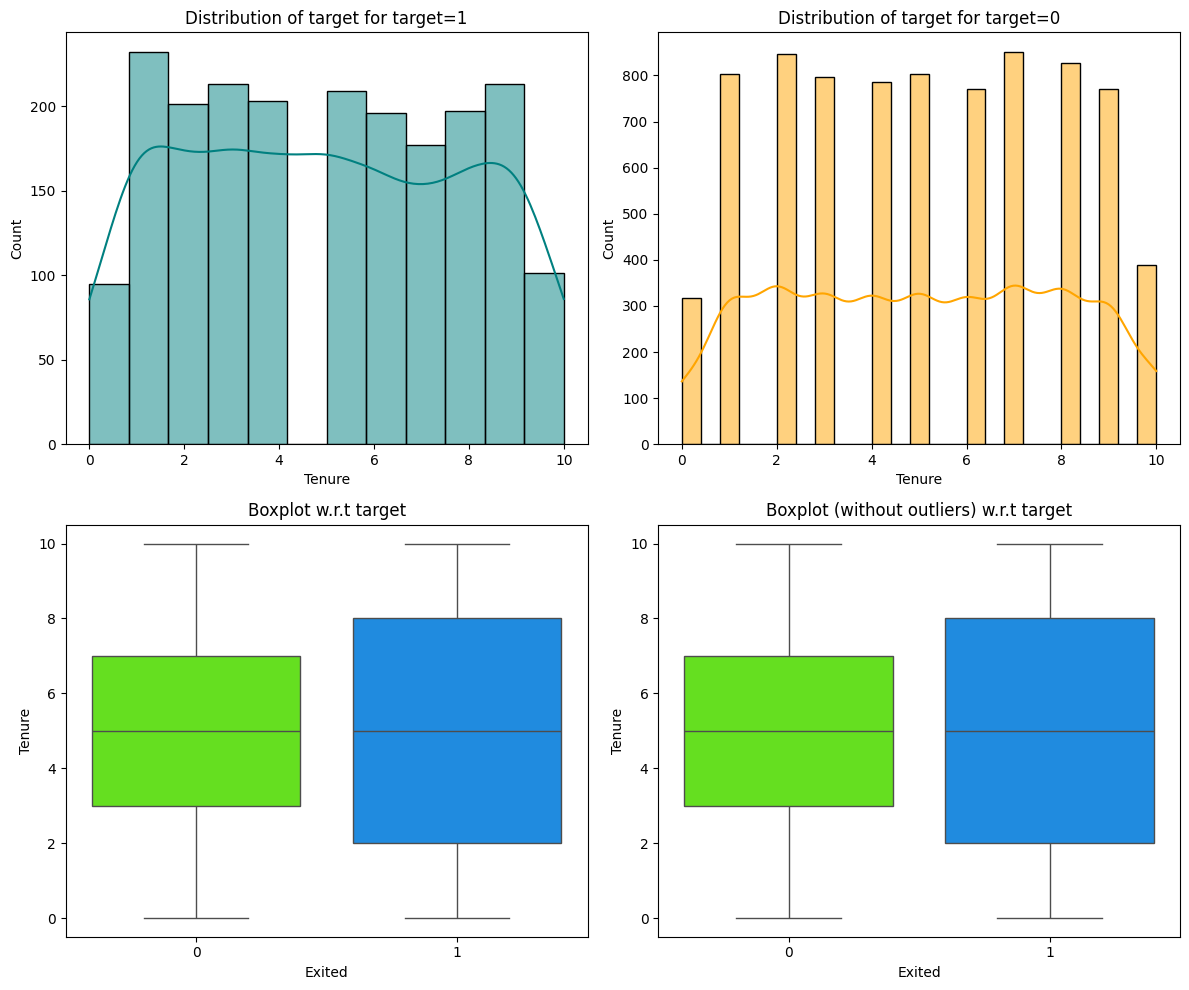

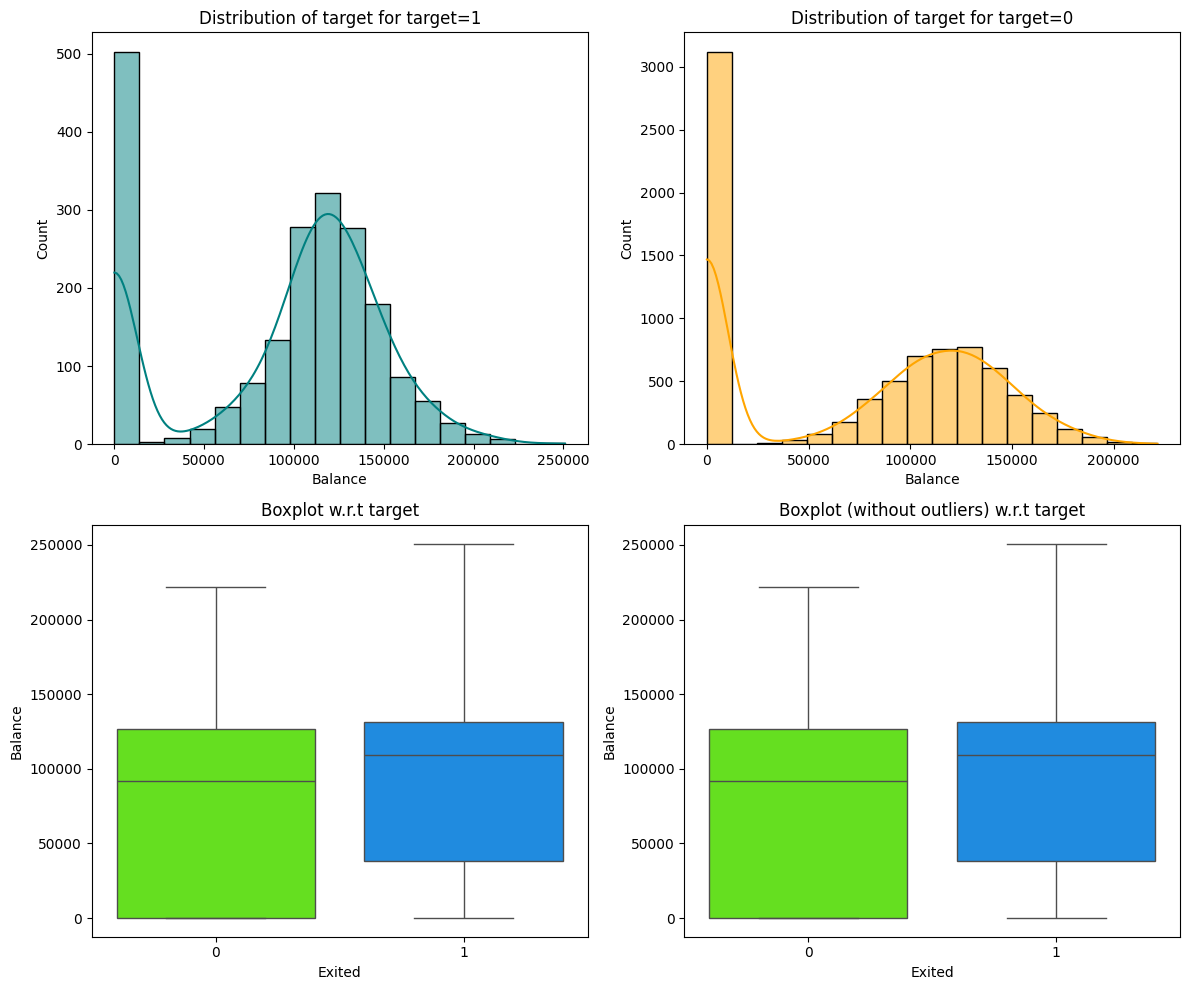

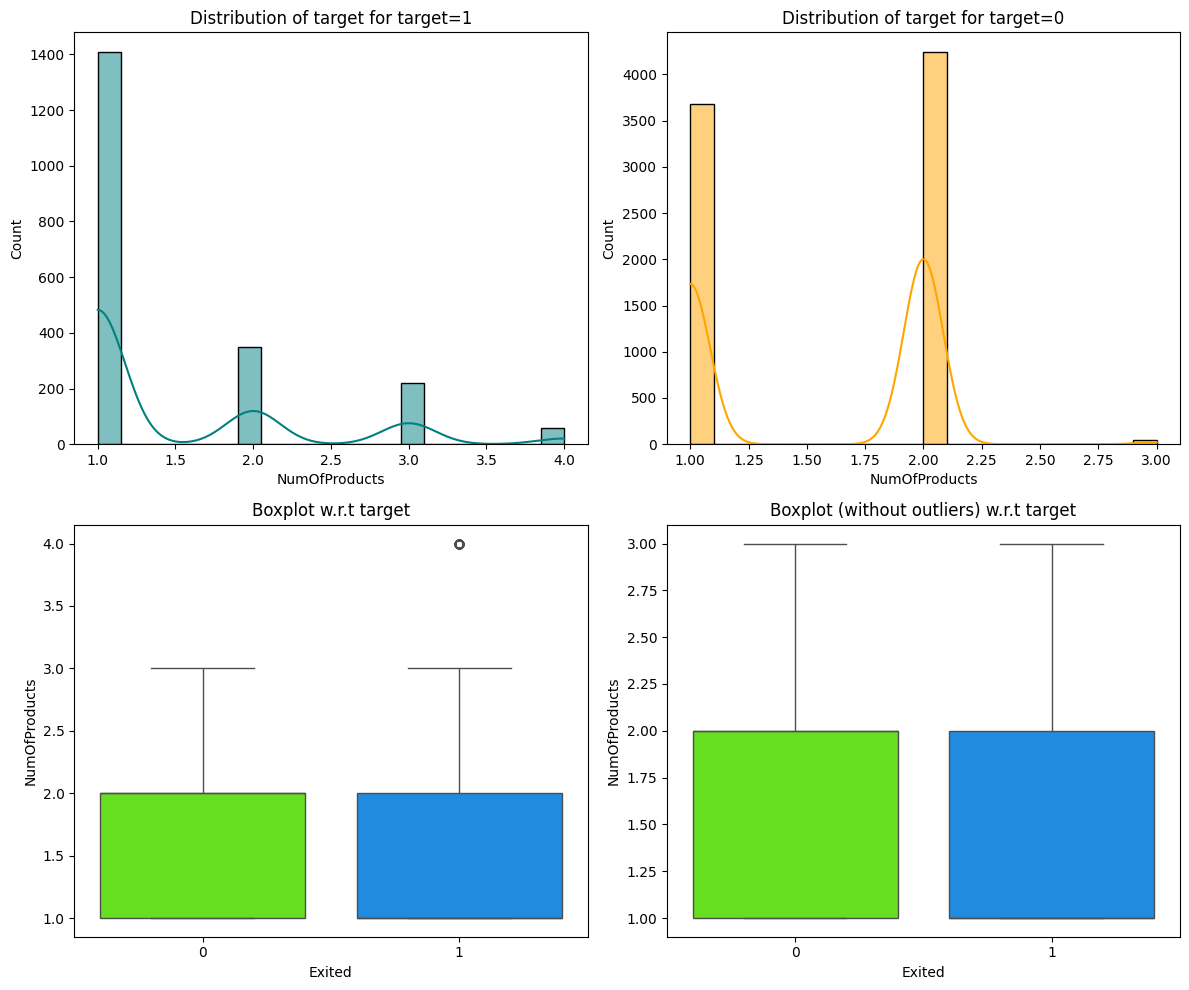

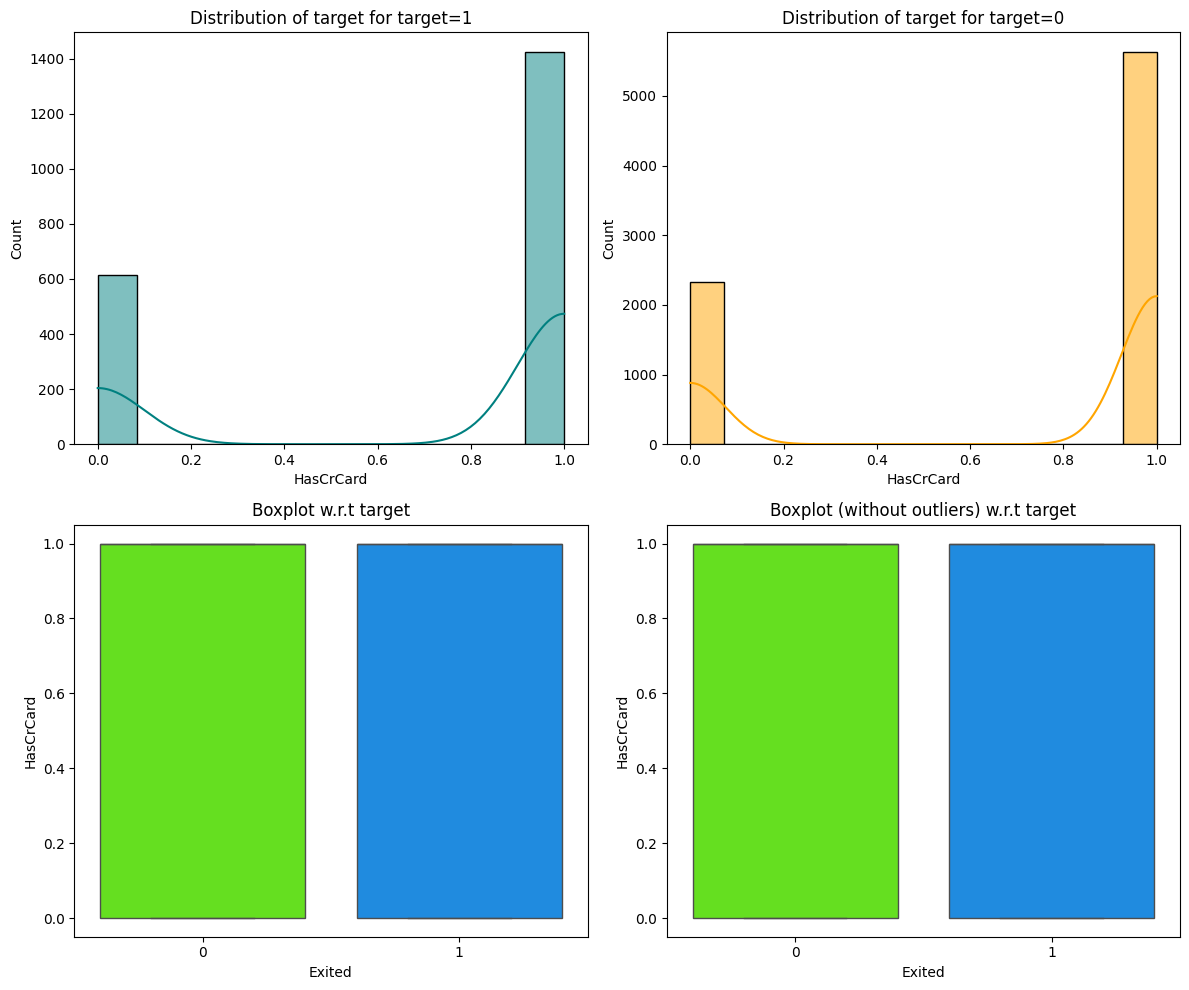

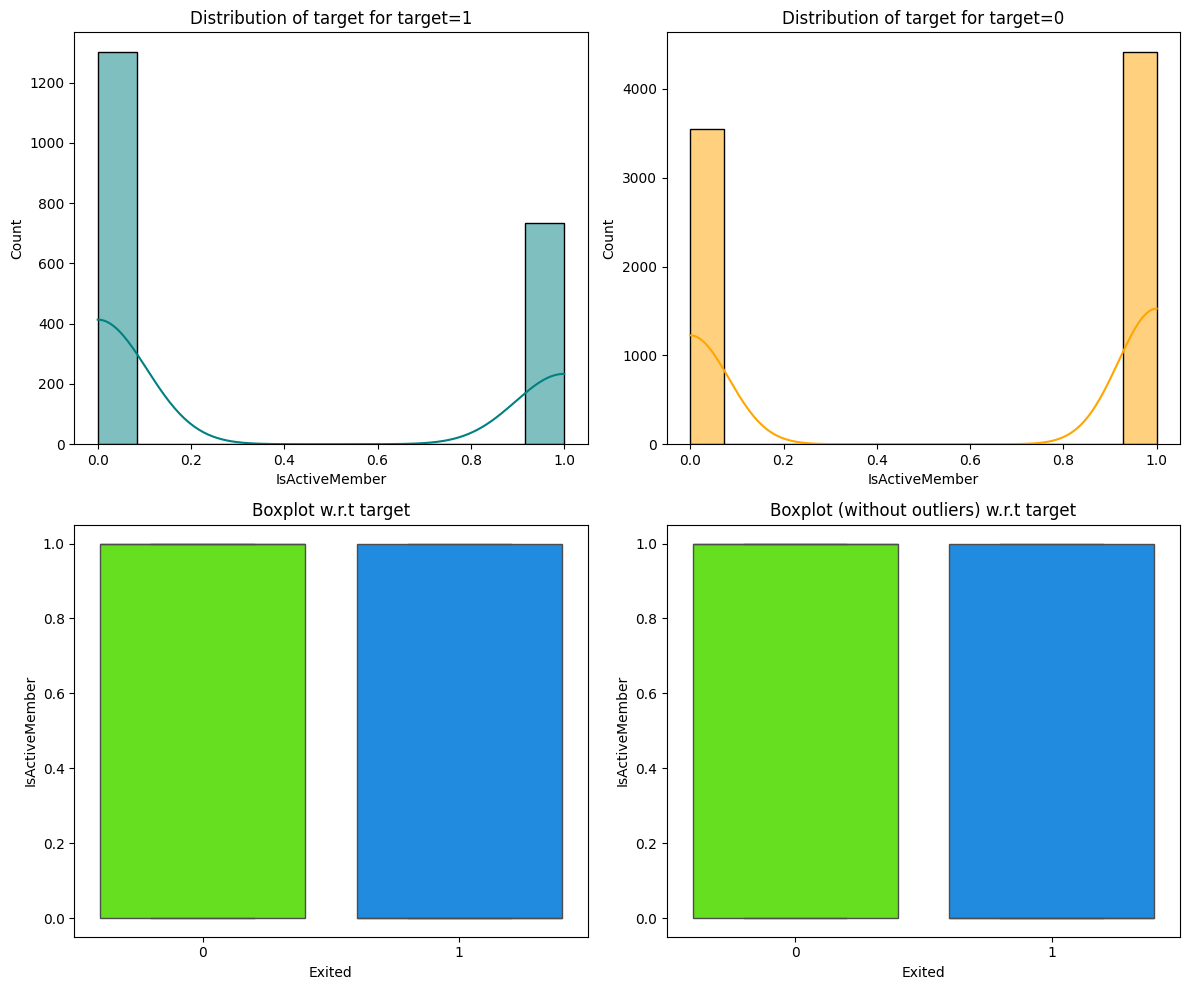

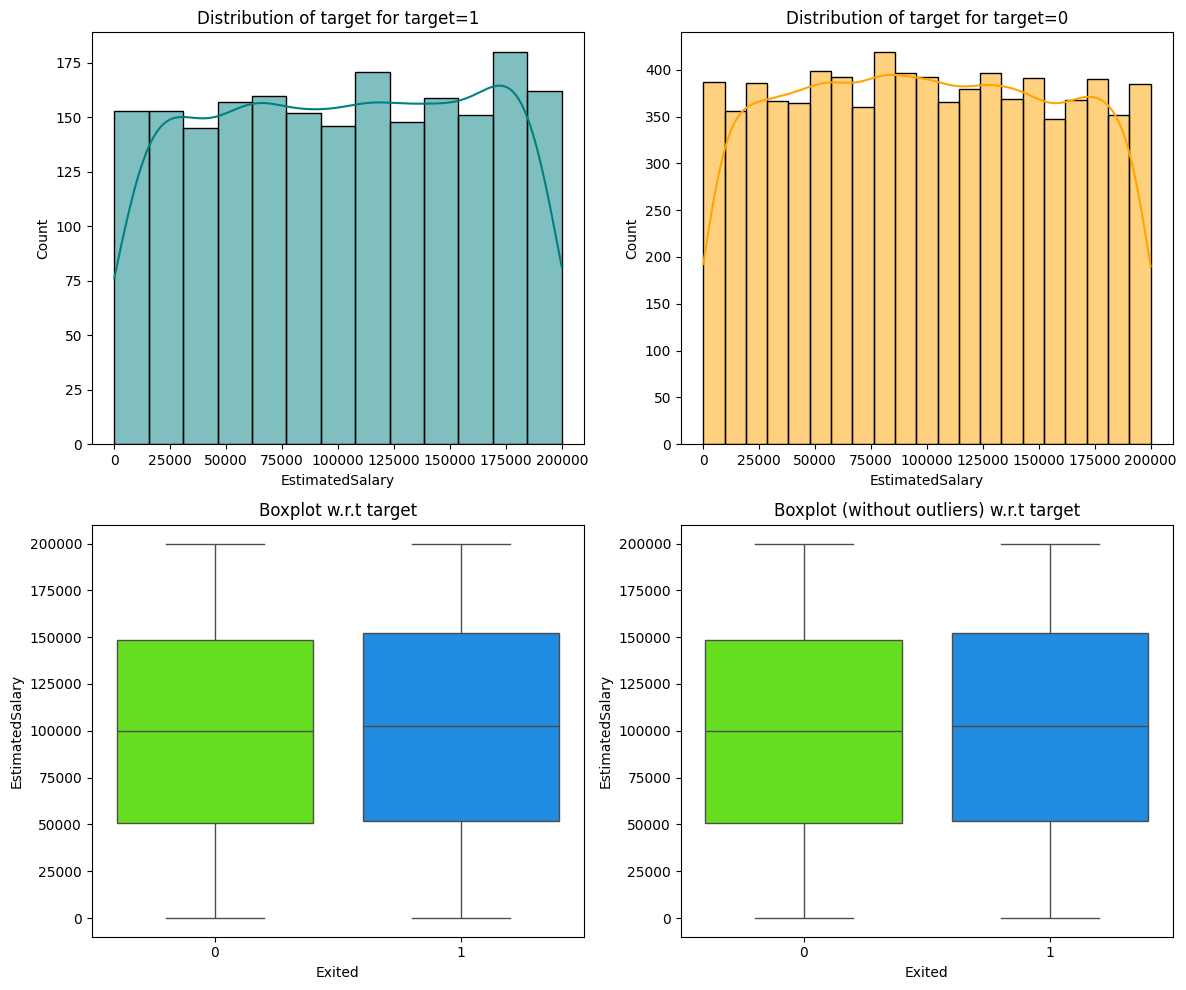

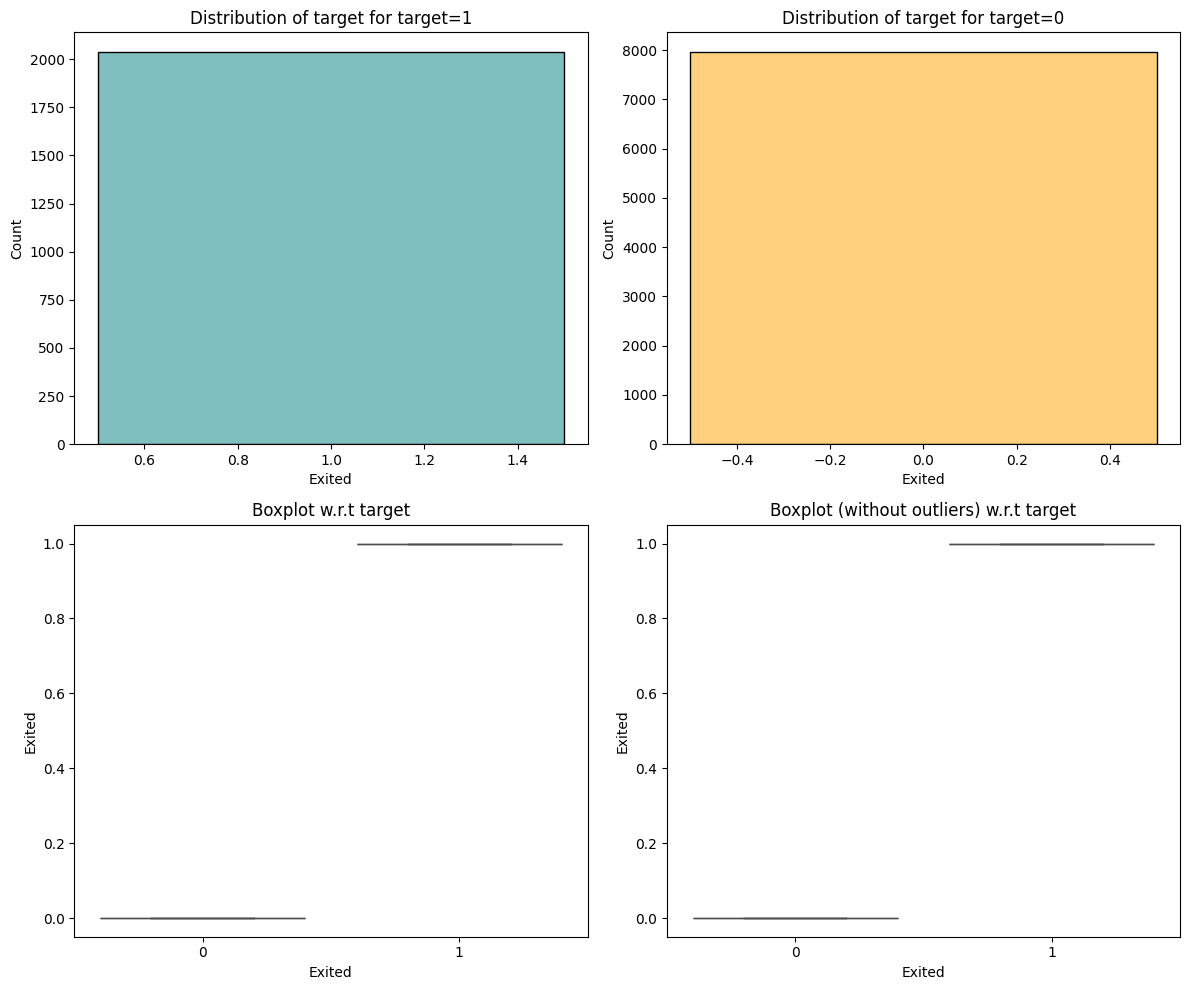

In [21]:
# Plot distribution_plot_wrt_target using the above function for all valid columns

for column in numerical_data:
  distribution_plot_wrt_target(df, column, 'Exited')

# Observations

- The distribution of Credit Scores is similar for both customers who have exited and those who remain.
- There is a negative correlation between customer age and exit probability: as age increases, the likelihood of exiting decreases.
- Higher account balances are associated with a reduced likelihood of customer exit.
- Active customers demonstrate a lower tendency to exit.

## Data Preprocessing

### Dummy Variable Creation

In [22]:
df = pd.get_dummies(df,columns=df.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
df = df.astype(float)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


### Train-validation-test Split

In [23]:
# drop and remove the target variable
X = df.drop(['Exited'],axis=1)
y = df['Exited']

In [24]:
# Split the data into the training and testing set

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y,shuffle = True)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_temp shape:", X_temp.shape)
print("y_temp shape:", y_temp.shape)


# Further splitting the training dataset into the training and validation set.

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=1)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (7000, 11)
y_train shape: (7000,)
X_temp shape: (3000, 11)
y_temp shape: (3000,)
X_test shape: (1500, 11)
y_test shape: (1500,)
X_val shape: (1500, 11)
y_val shape: (1500,)


### Data Normalization

In [25]:
# creating an instance of the standard scaler to normalize the numerical values with different scale
sc = StandardScaler()
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_val[num_cols] = sc.fit_transform(X_val[num_cols])
X_test[num_cols] = sc.fit_transform(X_test[num_cols])

X_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
count,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7000.000000,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000
mean,3.199980e-16,2.314339e-16,-3.806479e-17,-9.541574e-17,1.533000,0.707429,0.517000,3.578090e-16,0.250571,0.251000,0.552286
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,0.584162,0.454976,0.499747,1.000071e+00,0.433373,0.433619,0.497294
min,-3.113586e+00,-1.985818e+00,-1.732747e+00,-1.223574e+00,1.000000,0.000000,0.000000,-1.731234e+00,0.000000,0.000000,0.000000
25%,-6.895334e-01,-6.618404e-01,-6.952922e-01,-1.223574e+00,1.000000,0.000000,0.000000,-8.575486e-01,0.000000,0.000000,0.000000
50%,1.489209e-02,-1.889911e-01,-3.655792e-03,3.291978e-01,1.000000,1.000000,1.000000,-1.316060e-02,0.000000,0.000000,1.000000
75%,6.882400e-01,4.729979e-01,1.033799e+00,8.253132e-01,2.000000,1.000000,1.000000,8.549471e-01,1.000000,1.000000,1.000000
max,2.066013e+00,5.012351e+00,1.725435e+00,2.328332e+00,4.000000,1.000000,1.000000,1.749885e+00,1.000000,1.000000,1.000000


## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-


In [26]:
# create a function for plotting the confusion matrix
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [27]:
# create a function for plotting the metrics
def plot_metrics(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

    plt.xlabel("Predicted label")

In [28]:
# Dataframes to store the recall values
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [29]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
# Fix the seed to achieve consistency
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [30]:

#Initialize the neural network
model = Sequential()
# Adding the input layer with 128 neurons and relu as activation function
model.add(Dense(128, activation='relu', input_dim = X_train.shape[1]))
# Adding a hidden layer with 32 neurons and relu activation function
model.add(Dense(64, activation='relu'))
# Adding the output layer with 1 neuron and sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

In [31]:
# Use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)
metric = keras.metrics.Recall()

In [32]:
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [33]:
# Print the summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
start = time.time()
# Fit the model with appropriate batch size and epochs
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))
end=time.time()
print("Time taken in seconds ",end-start)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6637 - recall: 0.2775 - val_loss: 0.5764 - val_recall: 0.0000e+00
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5597 - recall: 0.0000e+00 - val_loss: 0.5262 - val_recall: 0.0000e+00
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5175 - recall: 0.0000e+00 - val_loss: 0.5041 - val_recall: 0.0000e+00
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4984 - recall: 0.0000e+00 - val_loss: 0.4928 - val_recall: 0.0000e+00
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4884 - recall: 0.0000e+00 - val_loss: 0.4858 - val_recall: 0.0000e+00
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4822 - recall: 0.0000e+00 - val_loss: 0.4807 - val_recall: 0.0000e+00
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4776 - recall: 0.0000e+00 - val_loss: 0.4765 - val_recall: 0.0000e+00
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4738 - rec

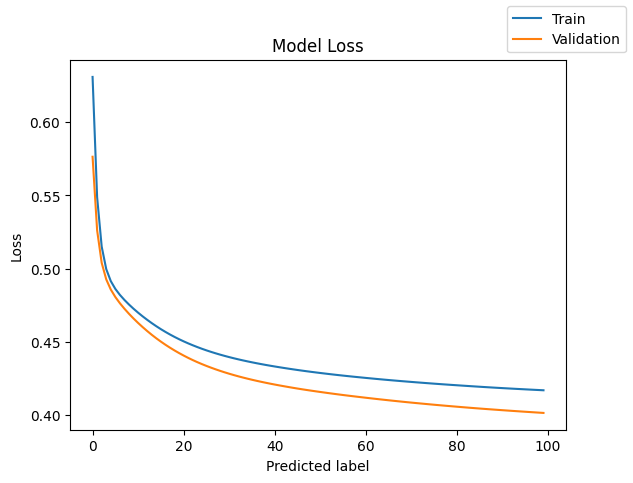

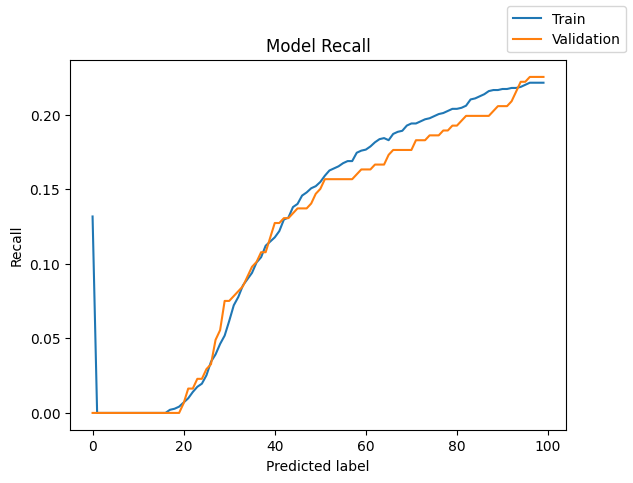

In [35]:
#Plotting loss of train set vs recall of validation set
plot_metrics(history,'loss')
#Plotting recall of train set vs recall of validation set
plot_metrics(history,'recall')

In [36]:
#Predicting the results using best as a threshold
y_train_pred = model.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [37]:
#Predicting the results using best as a threshold
y_val_pred = model.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [38]:
# Add the metrics to the dataframe created earlier

model_name = "NN with SGD optimizer"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

In [39]:
#Classification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90      5574
         1.0       0.69      0.22      0.33      1426

    accuracy                           0.82      7000
   macro avg       0.76      0.60      0.62      7000
weighted avg       0.80      0.82      0.78      7000



In [40]:
#Classification report
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      1194
         1.0       0.75      0.23      0.35       306

    accuracy                           0.83      1500
   macro avg       0.79      0.60      0.62      1500
weighted avg       0.82      0.83      0.79      1500



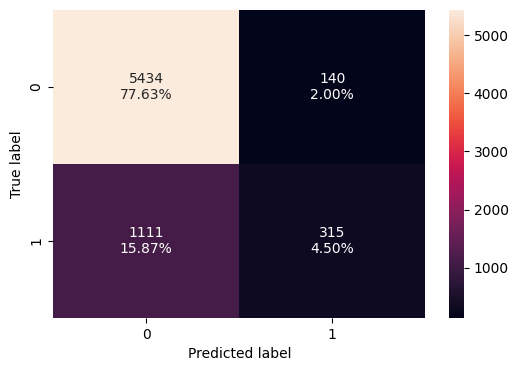

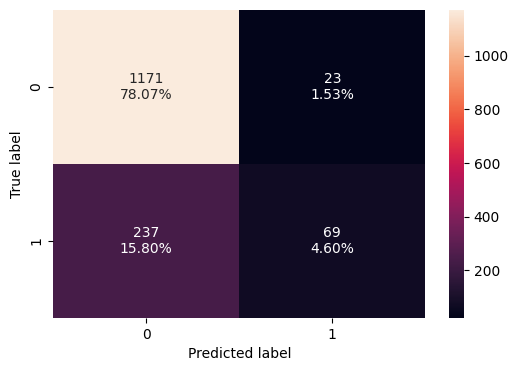

In [41]:
make_confusion_matrix(y_train, y_train_pred)
make_confusion_matrix(y_val, y_val_pred)

#Model Observations

- After multiple attempts I found the above Sequential NN Model with a little bit better performance, but not as much as I would expect.
- This model was able generate 9857 params (weights and bias).
- It took 81 seconds to train this model

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [42]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [43]:
#Initializing the neural network
model_1 = Sequential()
#Add an input layer
model_1.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
#Add a hidden layer
model_1.add(Dense(32,activation='relu'))
#Add output layer
model_1.add(Dense(1, activation = 'sigmoid'))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,697 (22.25 KB)

 Trainable params: 5,697 (22.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4982 - recall: 0.0422 - val_loss: 0.4014 - val_recall: 0.2320
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4153 - recall: 0.2407 - val_loss: 0.3858 - val_recall: 0.3039
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4039 - recall: 0.2752 - val_loss: 0.3767 - val_recall: 0.3268
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3941 - recall: 0.3217 - val_loss: 0.3681 - val_recall: 0.3497
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3844 - recall: 0.3442 - val_loss: 0.3600 - val_recall: 0.3758
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3735 - recall: 0.3635 - val_loss: 0.3511 - val_recall: 0.4150
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3623 - recall: 0.3857 - val_loss: 0.3420 - val_recall: 0.4542
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3524 - recall: 0.4108 - val_loss: 0.3362 - val_recall: 0.4608
Epoch 9

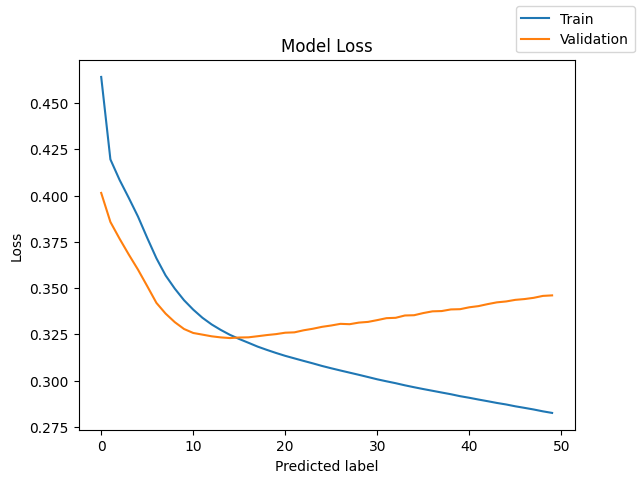

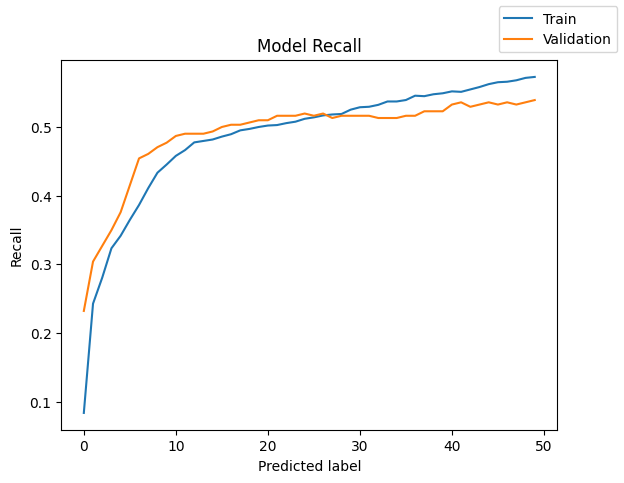

In [44]:
optimizer = tf.keras.optimizers.Adam()
metric = keras.metrics.Recall() #using recall as the metric
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

# Print the summary
model_1.summary()

start = time.time()
# Fit the model with appropriate batch size and epochs
history_1 = model_1.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_val, y_val))
end=time.time()
print("Time taken in seconds ",end-start)

#Plotting loss of train set vs loss of validation set
plot_metrics(history_1,'loss')
#Plotting recall of train set vs recall of validation set
plot_metrics(history_1,'recall')



In [45]:
#Predicting the results using best as a threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [46]:
#Predicting the results using best as a threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93      5574
         1.0       0.77      0.59      0.67      1426

    accuracy                           0.88      7000
   macro avg       0.83      0.77      0.80      7000
weighted avg       0.87      0.88      0.87      7000

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      1194
         1.0       0.70      0.54      0.61       306

    accuracy                           0.86      1500
   macro avg       0.79      0.74      0.76      1500
weighted avg       0.85      0.86      0.85      1500



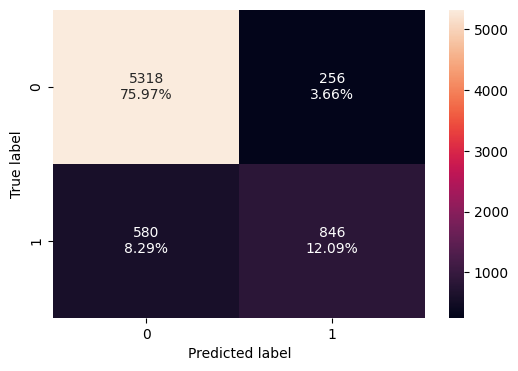

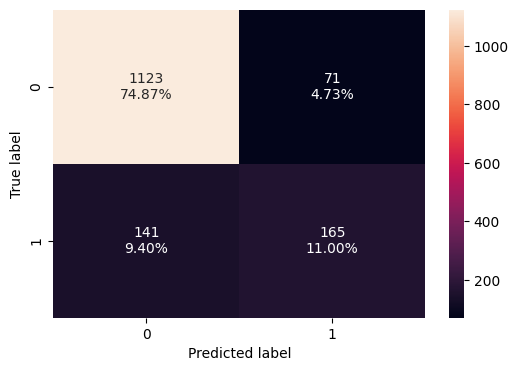

In [47]:
# Add the metrics to the dataframe created earlier
model_name = "NN with Adam optimizer"
train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)
#Classification report
cr = classification_report(y_train, y_train_pred)
print(cr)
#Classification report
cr = classification_report(y_val, y_val_pred)
print(cr)
make_confusion_matrix(y_train,y_train_pred)
make_confusion_matrix(y_val,y_val_pred)

#Observations:
- My NN with Adam optimizer model with two hidden layers (128 and 32 neurons respectively) didn't perform well.
- This model generated 5697 params (weights and biasis) in 45 seconds.
- At the end of 100 epochs, the training and validation losses didn't converg.
- There are 9.40% of false negatives, which is not a very bad model, but will continue fine tune with model.


### Neural Network with Adam Optimizer and Dropout

In [48]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

# defining the dropout ratio
# 0.2 means 20% of the neurons will be switched off
dropout_rate = 0.2

In [49]:
#Initializing the neural network

model_2 = Sequential()
model_2.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model_2.add(Dropout(dropout_rate))
model_2.add(Dense(32,activation="relu"))
model_2.add(Dense(1, activation = 'sigmoid'))

In [50]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_2.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["recall"])
model_2.summary()

start = time.time()
#Fitting the model with batch_size = 32 and 100 epochs
history_2 = model_2.fit(X_train,y_train,batch_size=32, epochs=100, verbose=1,validation_data=(X_val,y_val))

end=time.time()
print("Time taken in seconds ",end-start)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,697 (22.25 KB)

 Trainable params: 5,697 (22.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4934 - recall: 0.0385 - val_loss: 0.4058 - val_recall: 0.2059
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4241 - recall: 0.2016 - val_loss: 0.3913 - val_recall: 0.2582
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4086 - recall: 0.2601 - val_loss: 0.3779 - val_recall: 0.2908
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3960 - recall: 0.3003 - val_loss: 0.3653 - val_recall: 0.3366
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3883 - recall: 0.3399 - val_loss: 0.3579 - val_recall: 0.3366
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3771 - recall: 0.3674 - val_loss: 0.3487 - val_recall: 0.3562
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3648 - recall: 0.3906 - val_loss: 0.3395 - val_recall: 0.4150
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3593 - recall: 0.4043 - val_loss: 0.3334 - val_recall: 0.4346


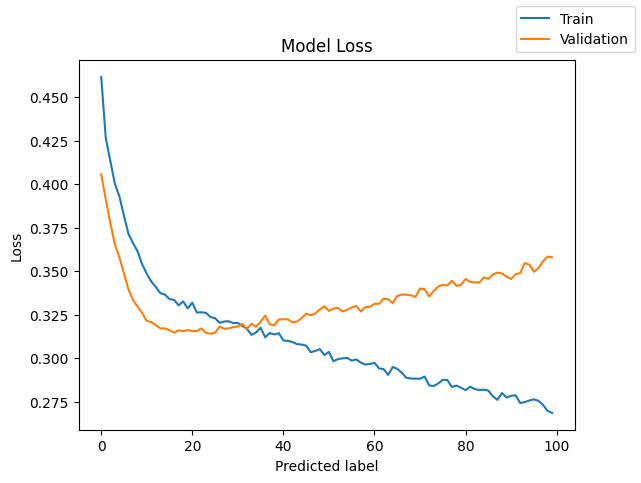

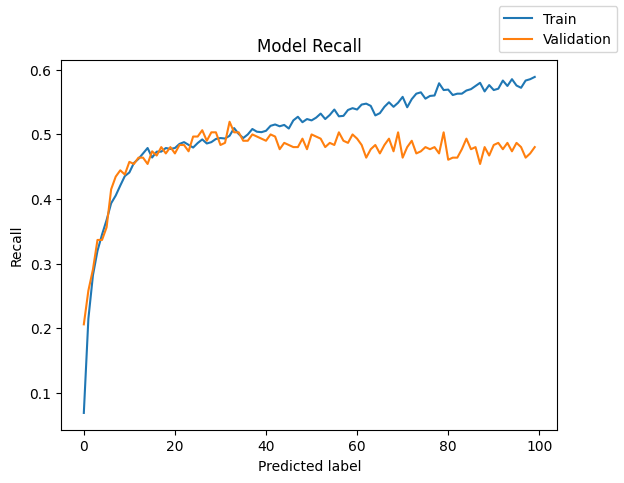

In [51]:
#Plotting loss of train set vs recall of validation set
plot_metrics(history_2,'loss')
#Plotting recall of train set vs recall of validation set
plot_metrics(history_2,'recall')


In [52]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
print(y_train_pred)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [53]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
print(y_val_pred)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [ True]]


              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      5574
         1.0       0.90      0.58      0.70      1426

    accuracy                           0.90      7000
   macro avg       0.90      0.78      0.82      7000
weighted avg       0.90      0.90      0.89      7000

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1194
         1.0       0.76      0.48      0.59       306

    accuracy                           0.86      1500
   macro avg       0.82      0.72      0.75      1500
weighted avg       0.85      0.86      0.85      1500



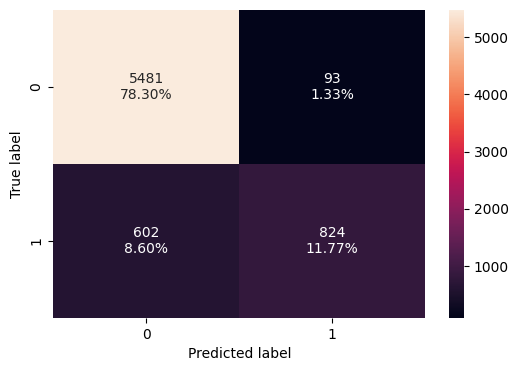

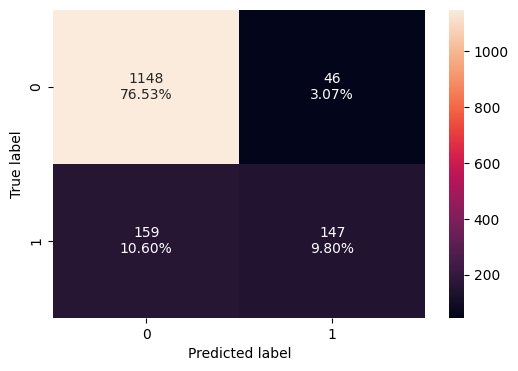

In [54]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

#classification report
cr = classification_report(y_val,y_val_pred)
print(cr)


#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

#Observations:
- In this model, I added 20% drop outs to see if it keeps the same performance and decreases the model training time by simplying the model.
- The false negatives have increase to 10.60% and there was no reduction in the model training time (85 seconds), hence decided to not go with this model.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [55]:
sm = SMOTE(random_state=42)
# Fit SMOTE on the training data.
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (11148, 11)
After UpSampling, the shape of train_y: (11148,) 



In [56]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [57]:
# Initializing the model
model_3 = Sequential()
# Add a input layer
model_3.add(Dense(128,activation='relu',input_dim = X_train_smote.shape[1]))
# Add a hidden layer
model_3.add(Dense(32,activation='relu'))
# Add a hidden layer
model_3.add(Dense(8,activation='relu'))
# Add the output layer with a sigmoid activation function.
model_3.add(Dense(1, activation = 'sigmoid'))

In [58]:
#using SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=["recall"])

model_3.summary()
start = time.time()
#Fitting the model with batch_size = 32 and 100 epochs
history_3 = model_3.fit(X_train_smote,y_train_smote,batch_size=32, epochs=100, verbose=1,validation_data=(X_val,y_val))

end=time.time()
print("Time taken in seconds ",end-start)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,937 (23.19 KB)

 Trainable params: 5,937 (23.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6953 - recall: 0.4184 - val_loss: 0.6760 - val_recall: 0.4869
Epoch 2/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6875 - recall: 0.4576 - val_loss: 0.6690 - val_recall: 0.5392
Epoch 3/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6810 - recall: 0.5061 - val_loss: 0.6639 - val_recall: 0.5686
Epoch 4/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6753 - recall: 0.5600 - val_loss: 0.6589 - val_recall: 0.5850
Epoch 5/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6699 - recall: 0.5902 - val_loss: 0.6536 - val_recall: 0.6144
Epoch 6/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6644 - recall: 0.6054 - val_loss: 0.6476 - val_recall: 0.6471
Epoch 7/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6588 - recall: 0.6160 - val_loss: 0.6409 - val_recall: 0.6765
Epoch 8/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6530 - recall: 0.6250 - val_loss: 0.6339 - val_recall: 0.6830


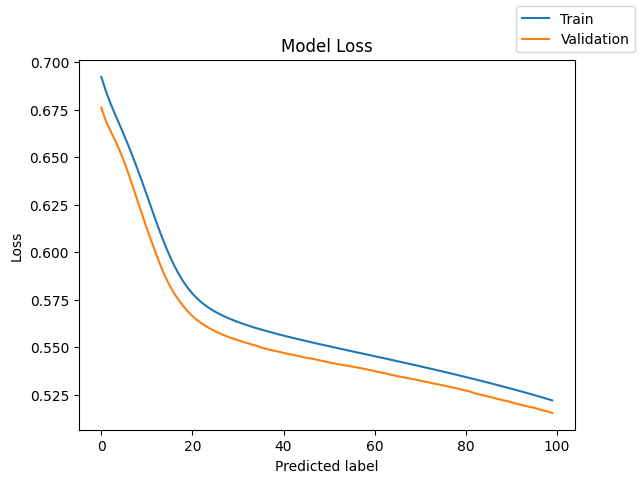

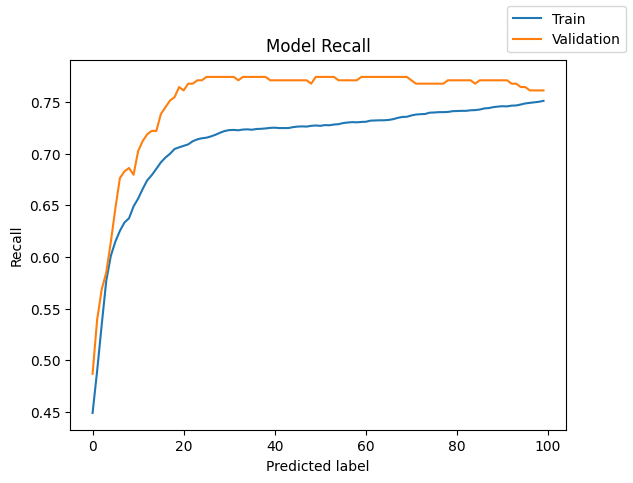

In [59]:
#Plotting loss of train set vs recall of validation set
plot_metrics(history_3,'loss')
#Plotting recall of train set vs recall of validation set
plot_metrics(history_3,'recall')

In [60]:
#Predicting the results using best as a threshold
y_train_pred = model_3.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
print(y_train_pred)

349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[False]
 [ True]
 [False]
 ...
 [False]
 [ True]
 [ True]]


In [61]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_3.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
print(y_val_pred)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[ True]
 [False]
 [ True]
 ...
 [ True]
 [False]
 [ True]]


              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73      5574
         1.0       0.73      0.75      0.74      5574

    accuracy                           0.74     11148
   macro avg       0.74      0.74      0.74     11148
weighted avg       0.74      0.74      0.74     11148

              precision    recall  f1-score   support

         0.0       0.92      0.73      0.81      1194
         1.0       0.42      0.76      0.54       306

    accuracy                           0.73      1500
   macro avg       0.67      0.74      0.68      1500
weighted avg       0.82      0.73      0.76      1500



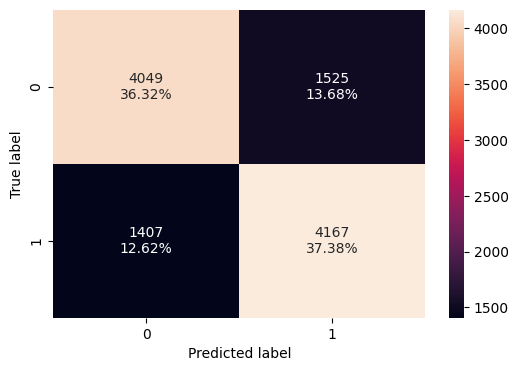

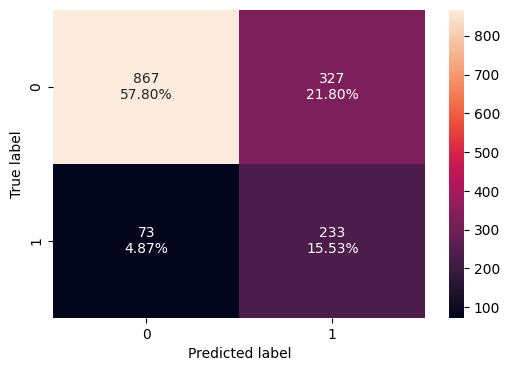

In [62]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

#classification report
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

#classification report
cr = classification_report(y_val,y_val_pred)
print(cr)


#Calculating the confusion matrix
make_confusion_matrix(y_train_smote,y_train_pred)

#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [63]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [64]:
# Initializing the model
model_4 = Sequential()
# Add a input layer and activation function)
model_4.add(Dense(128,activation='relu',input_dim = X_train_smote.shape[1]))
# Add a hidden layer and activation function)
model_4.add(Dense(32,activation='relu'))
# Add a hidden layer and activation function)
model_4.add(Dense(8,activation='relu'))
# Add the required number of neurons in the output layer with a sigmoid activation function.
model_4.add(Dense(1, activation = 'sigmoid'))

In [65]:
#using Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=["recall"])
model_4.summary()
start = time.time()
#Fitting the model with batch_size = 32 and 100 epochs
history_4 = model_4.fit(X_train_smote,y_train_smote,batch_size=32, epochs=100, verbose=1,validation_data=(X_val,y_val))
end=time.time()
print("Time taken in seconds ",end-start)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,937 (23.19 KB)

 Trainable params: 5,937 (23.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6034 - recall: 0.6498 - val_loss: 0.4733 - val_recall: 0.6732
Epoch 2/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5242 - recall: 0.7351 - val_loss: 0.4142 - val_recall: 0.6667
Epoch 3/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4715 - recall: 0.7603 - val_loss: 0.3848 - val_recall: 0.6830
Epoch 4/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4365 - recall: 0.7855 - val_loss: 0.3805 - val_recall: 0.6928
Epoch 5/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4193 - recall: 0.7950 - val_loss: 0.3758 - val_recall: 0.6928
Epoch 6/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4074 - recall: 0.8005 - val_loss: 0.3743 - val_recall: 0.6863
Epoch 7/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3981 - recall: 0.8049 - val_loss: 0.3748 - val_recall: 0.6797
Epoch 8/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3893 - recall: 0.8111 - val_loss: 0.3771 - val_recall: 0.6699


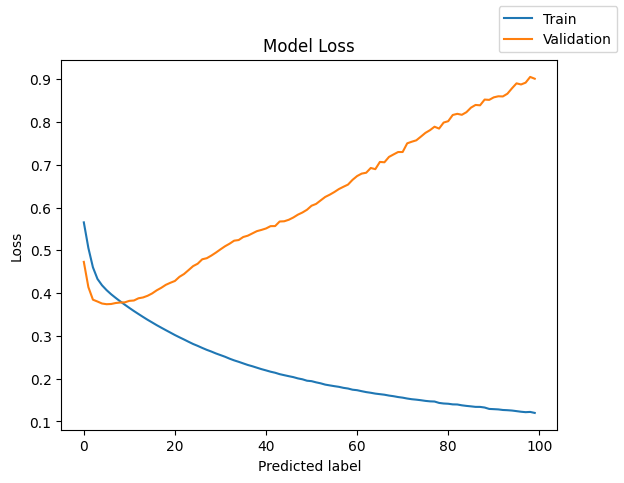

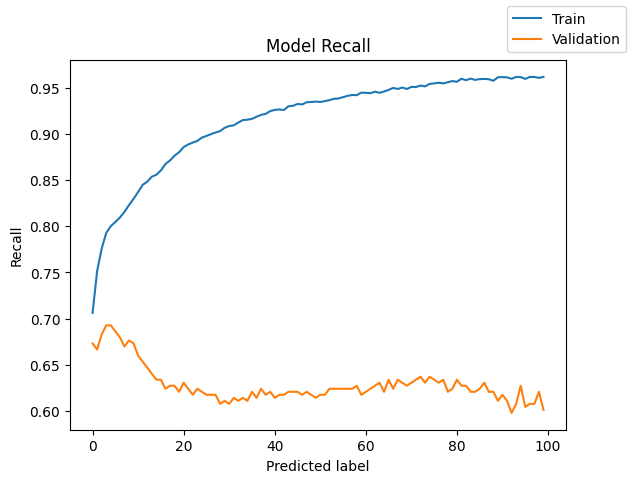

In [66]:
#Plotting loss of train set vs recall of validation set
plot_metrics(history_4,'loss')
#Plotting recall of train set vs recall of validation set
plot_metrics(history_4,'recall')

In [67]:
#Predicting the results using best as a threshold
y_train_pred = model_4.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
print(y_train_pred)

349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [ True]
 [ True]]


In [68]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_4.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
print(y_val_pred)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [ True]]


              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      5574
         1.0       0.95      0.94      0.95      5574

    accuracy                           0.95     11148
   macro avg       0.95      0.95      0.95     11148
weighted avg       0.95      0.95      0.95     11148

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87      1194
         1.0       0.52      0.60      0.56       306

    accuracy                           0.80      1500
   macro avg       0.71      0.73      0.72      1500
weighted avg       0.82      0.80      0.81      1500



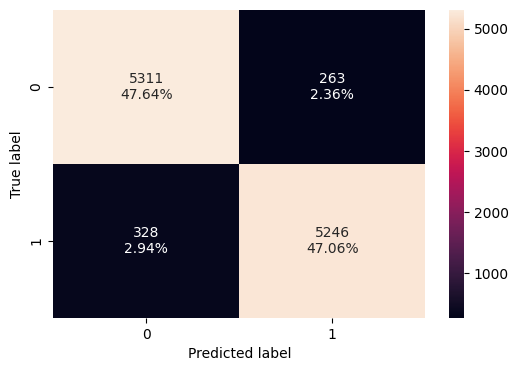

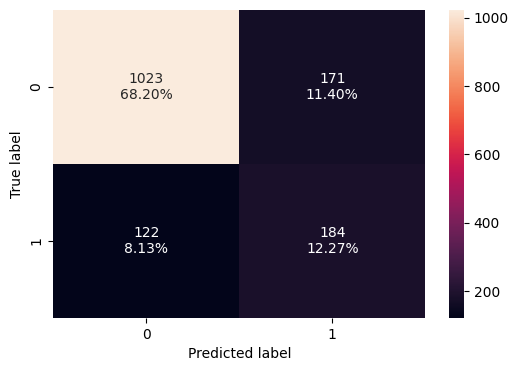

In [69]:
model_name = "NN with SMOTE & Adam"
train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)
#classification report
cr=classification_report(y_train_smote,y_train_pred)
print(cr)
#classification report
cr = classification_report(y_val,y_val_pred)
print(cr)

#Calculating the confusion matrix
make_confusion_matrix(y_train_smote,y_train_pred)
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [70]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [71]:
# Initializing the model
model_5 = Sequential()
# Add a input layer and activation function
model_5.add(Dense(128,activation='relu',input_dim = X_train_smote.shape[1]))
model_5.add(Dropout(dropout_rate))
# Add a hidden layer and activation function)
model_5.add(Dense(32,activation='relu'))
# Add a hidden layer and activation function)
model_5.add(Dense(8,activation='relu'))
# Add the required number of neurons in the output layer with a sigmoid activation function.
model_5.add(Dense(1, activation = 'sigmoid'))

In [72]:
#using Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=["recall"])
model_5.summary()
start = time.time()
#Fitting the model with batch_size = 32 and 100 epochs
history_5 = model_5.fit(X_train_smote,y_train_smote,batch_size=32, epochs=100, verbose=1,validation_data=(X_val,y_val))
end=time.time()
print("Time taken in seconds ",end-start)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,937 (23.19 KB)

 Trainable params: 5,937 (23.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6158 - recall: 0.7069 - val_loss: 0.4698 - val_recall: 0.7026
Epoch 2/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5269 - recall: 0.7229 - val_loss: 0.4359 - val_recall: 0.6993
Epoch 3/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4844 - recall: 0.7556 - val_loss: 0.4285 - val_recall: 0.7484
Epoch 4/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4591 - recall: 0.7742 - val_loss: 0.4095 - val_recall: 0.7418
Epoch 5/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4476 - recall: 0.7808 - val_loss: 0.4166 - val_recall: 0.7484
Epoch 6/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4334 - recall: 0.7872 - val_loss: 0.4109 - val_recall: 0.7418
Epoch 7/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4230 - recall: 0.7971 - val_loss: 0.4167 - val_recall: 0.7712
Epoch 8/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4171 - recall: 0.8015 - val_loss: 0.4062 - val_recall: 0.7386


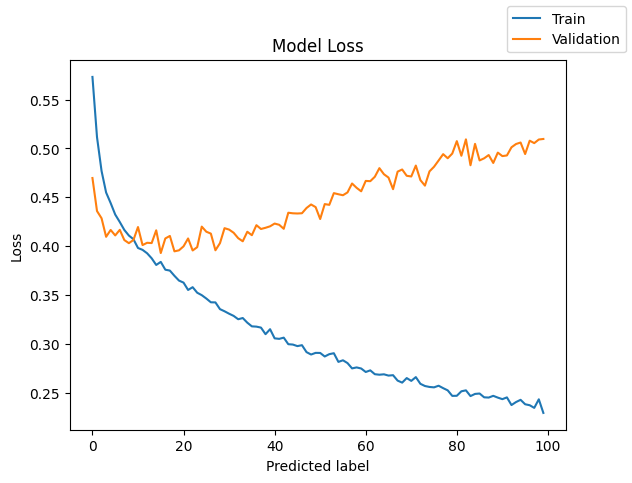

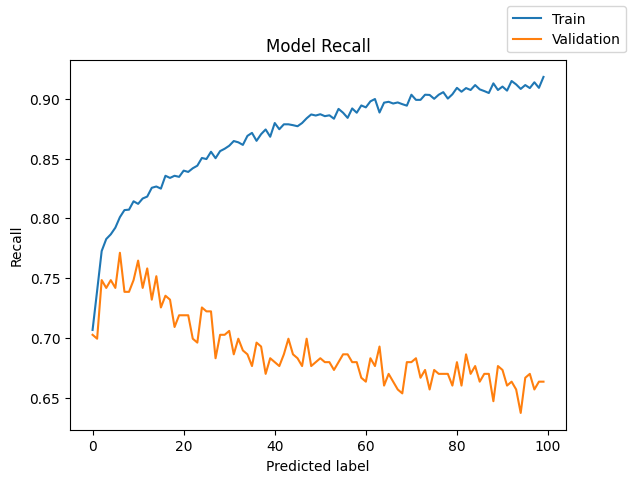

In [73]:
#Plotting loss of train set vs recall of validation set
plot_metrics(history_5,'loss')
#Plotting recall of train set vs recall of validation set
plot_metrics(history_5,'recall')

In [74]:
#Predicting the results using best as a threshold
y_train_pred = model_5.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
print(y_train_pred)

349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [ True]
 [ True]]


In [75]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_5.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
print(y_val_pred)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [ True]]


              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      5574
         1.0       0.94      0.96      0.95      5574

    accuracy                           0.95     11148
   macro avg       0.95      0.95      0.95     11148
weighted avg       0.95      0.95      0.95     11148

              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88      1194
         1.0       0.55      0.66      0.60       306

    accuracy                           0.82      1500
   macro avg       0.73      0.76      0.74      1500
weighted avg       0.84      0.82      0.83      1500



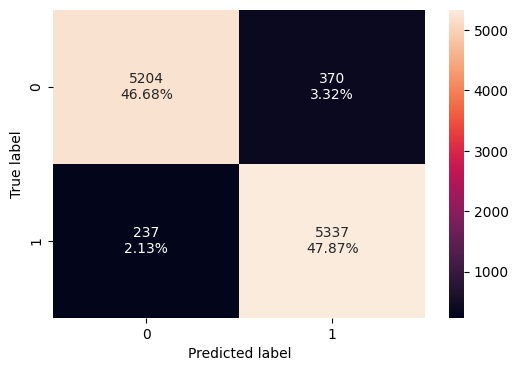

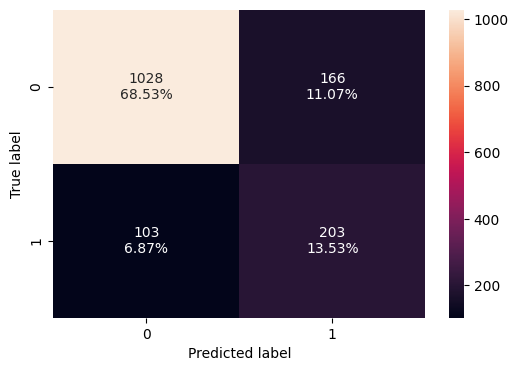

In [76]:
model_name = "NN with SMOTE Adam and Dropout"
train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)
#classification report
cr=classification_report(y_train_smote,y_train_pred)
print(cr)
#classification report
cr = classification_report(y_val,y_val_pred)
print(cr)
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote,y_train_pred)
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

## Model Performance Comparison and Final Model Selection

In [77]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD optimizer,0.220898
NN with Adam optimizer,0.593268
NN with Adam & Dropout,0.577840
NN with SMOTE & SGD,0.747578
NN with SMOTE & Adam,0.941155
NN with SMOTE Adam and Dropout,0.957481


In [78]:
print("Validation performance comparison")
valid_metric_df

Validation performance comparison


,recall
NN with SGD optimizer,0.225490
NN with Adam optimizer,0.539216
NN with Adam & Dropout,0.480392
NN with SMOTE & SGD,0.761438
NN with SMOTE & Adam,0.601307
NN with SMOTE Adam and Dropout,0.663399


## Observations

From the above performaces of 5 models, I decided to go with "NeuralNetwork with SMOTE & SGD" as it is performing better than other models and there is little difference between training and test data, which makes me decide that it is generalizing very well with the unseen data.

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[ True]
 [False]
 [False]
 ...
 [ True]
 [False]
 [ True]]
              precision    recall  f1-score   support

         0.0       0.92      0.73      0.81      1195
         1.0       0.41      0.73      0.53       305

    accuracy                           0.73      1500
   macro avg       0.66      0.73      0.67      1500
weighted avg       0.81      0.73      0.76      1500



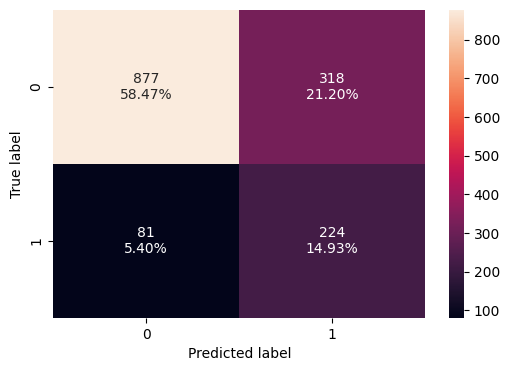

In [79]:
# Test the best model with the test data
y_test_pred = model_3.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

#classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

#Plot the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations

### Actionable Insights

With the model established, businesses can analyze production data to identify customers who are at risk of churning.

Utilizing visualization techniques, such as precision-recall curves, can effectively illustrate the model's performance. These visual tools simplify the communication of insights to business stakeholders who may lack a technical background.

Investigate time-related trends in churn to identify correlations with particular periods, such as following promotional campaigns or service updates. This can help clarify when and why churn rates tend to fluctuate.

Monitor both the model's predictions and actual churn rates over time to evaluate its effectiveness. Look for trends or patterns in churn in relation to external factors, such as changes in market conditions.

### Recommendations

Based on these insights, the bank can design targeted marketing campaigns aimed specifically at customers who show signs of wanting to leave. These campaigns should include personalized incentives like exclusive discounts, cashback rewards, or loyalty programs.

**Personalized Communication**: Develop tailored communication strategies to inform customers about how they can benefit from these offers based on their recent behavior.

Introduce engagement initiatives like “We Miss You” campaigns for those exhibiting a likelihood of leaving. These initiatives could include reminders about unutilized benefits, complimentary trials of premium services, or offers customized to their previous interactions. Engage at-risk customers further by soliciting their feedback through brief surveys, allowing the bank to understand their concerns and barriers to usage, and to develop appropriate solutions.

Focus on enhancing relationships with key customers by assigning dedicated relationship managers who regularly check in to offer value-added services, financial guidance, and support. Consistently communicate the benefits they receive from the bank's services by sending monthly statements that highlight rewards earned, savings accumulated, or benefits utilized, reinforcing the relationship.

Establish feedback mechanisms to directly gather insights from customers who have churned about their reasons for leaving. This could involve conducting surveys or follow-up calls to better understand their specific pain points.

<font size=6 color='blue'>Power Ahead</font>
___